# Search Algorithm
---

Consider an autonomous mobile robot in a crowded environment that needs to find  an  efficient  pathfrom  its  current  location S to  a  desired  location G.  As  an idealization of the situation, assume that theobstacles (whatever they may be) are  abstracted  by  polygons.  The  problem  now  reduces  to  finding  theshortest path between two points in a plane that has convex polygonal obstacles.

    (a) How do we formulate the state-space? How many states are there? How many paths are there tothe goal? Think carefully to define a good state-space. Justify your decisions.
    
        Formution of state space is to discretize the continuos space and model it as a graph.
    
    (b) How do we define the actions in your formulation of the state-space?
    
        Action is moving from one point to another.
        
    (c)  Formulate  this  problem  in  Python  by  subclassing  the  Problem  class  in “search.py” of the  reference implementation.  Take  extra  care  to  implement ACTIONS to find successor states of a given state.
        
        refer problem.py
     
    (d)  Define  your  evaluation  function  to  evaluate  the  goodness  or  badness  of  a state using an admissible heuristics function 
        
        Uses Euclidean distance as an heuristic.
        
    (e) Create several instances (at least 100) of this problem by randomly generating planes with randomstart and goal points and random polygons as obstacles.
    
        refer Test generation in this file
    
    (f) Solve all the instancesusing the following search strategies:
        _ Any basic strategy of your choice (DFS/BFS/IDS)
        _ Best-first greedy search
        _ A* search
        
        You may use the reference Python code to implement these search algorithms.
        
        refer problem.py
    
    (g)  Perform  an  empirical  analysis  in  terms  of  number  of  nodes  generated, expanded,  actual  time  taken,completeness,  optimality,  etc.  Which  algorithm performs better, in general, on all the instances?
      
         refer last section of this file


In [1]:
import time
import random
import math
import matplotlib.pyplot as plt
import shapely.geometry as sg
import shapely.ops as so

plt.rcParams["figure.figsize"] = (15,8)

from problem import PathSearch 

In [2]:
# This is the set of polygon obstacles, with inital and goal states
polygons = [
    [(2.0,0.5), (12.0, 0.5), (12.0, 4.0), (2.0, 4.0)],
    [(13.5, 2.0), (15.7, 4.5), (13.0, 7.2)],
    [(19.0, 0.7), (21, 1.8), (21.0, 4.0), (19.0,5.8), (17.0, 4.0), (17.0, 1.8)],
    [(5.0, 6.0), (7.0, 10.6), (5.0, 13.8), (1.0, 10.4), (1.8, 7.0)],
    [(7.0, 5.8), (10.0, 5.8), (8.5, 11.0)],
    [(11.0, 9.2), (14.0, 11.8), (13.0, 13.5), (11.3, 13.0)],
    [(14.8, 6.3), (18.7, 6.3), (18.7, 13.0), (14.8, 13.0)],
    [(21.4, 5.5), (22.4, 12.0), (21.0, 13.0), (20.0, 12.3)]
]

initial = (1.0, 2.0)
goal = (23.0, 13.3)
pol_list = [sg.Polygon(p) for p in polygons]

maze = PathSearch(initial, goal, polygons) 

In [3]:
def plot_polygons(pol_list, maze, edges=False, title="Given Polygons with start and goal state"):
    '''
    The function takes in a set of polygons (shapely Polygon objects) and plots them in a plane.
    The variable edge decides whether to display the edges present in the graph or not
    '''
    new_shape = so.cascaded_union(pol_list)
    fig, axs = plt.subplots()
    axs.set_aspect('equal', 'datalim')

    for geom in new_shape.geoms:    
        xs, ys = geom.exterior.xy    
        axs.fill(xs, ys, alpha=0.5, fc='b', ec='none')

    if edges:
        for p1 in range(len(maze.adj_mat)):
            for p2 in range(p1 + 1, len(maze.adj_mat)):
                if maze.adj_mat[p1][p2] != math.inf:
                    axs.plot([maze.pointList[p1][0], maze.pointList[p2][0]], [maze.pointList[p1][1], maze.pointList[p2][1]])    

    plt.scatter(*initial, label="Start State", c='red', s=65)
    plt.scatter(*goal, label="Goal State", c='green', s=65)
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_path(pol_list, maze, path, title="Given Polygons with start and goal state"):
    '''
    The function takes in a path to reach goal state and prints the edges along the path with the set of polygons
    '''
    new_shape = so.cascaded_union(pol_list)
    fig, axs = plt.subplots()
    axs.set_aspect('equal', 'datalim')

    for geom in new_shape.geoms:    
        xs, ys = geom.exterior.xy    
        axs.fill(xs, ys, alpha=0.5, fc='b', ec='none')
    
    for ind in range(len(path)):
        if ind != len(path)-1:
            axs.plot([maze.pointList[path[ind]][0], maze.pointList[path[ind+1]][0]], [maze.pointList[path[ind]][1], maze.pointList[path[ind+1]][1]])    
        axs.scatter([maze.pointList[path[ind]][0]], [maze.pointList[path[ind]][1]], s=50, c="blue")
    
    plt.scatter(*initial, label="Start State", c='red', s=65)
    plt.scatter(*goal, label="Goal State", c='green', s=65)
    plt.title(title)
    plt.legend()
    plt.show()    

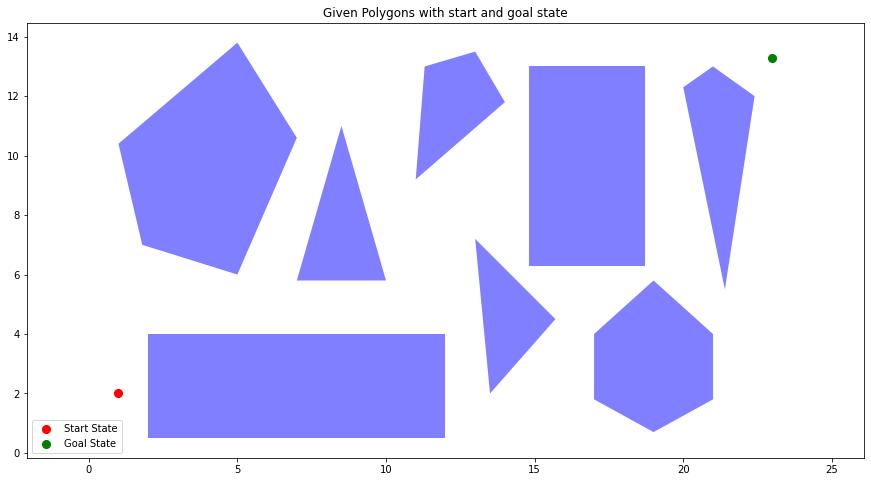

In [4]:
plot_polygons(pol_list, maze)

### Discretizing a continuous state space to perform Uninformed and informed searches

    Idea is to consider the vertices of polygons as nodes and connections (non-intersecting with other polygons) between them as edges.The resulting graph formed can be used to perform various search Algorithms
        

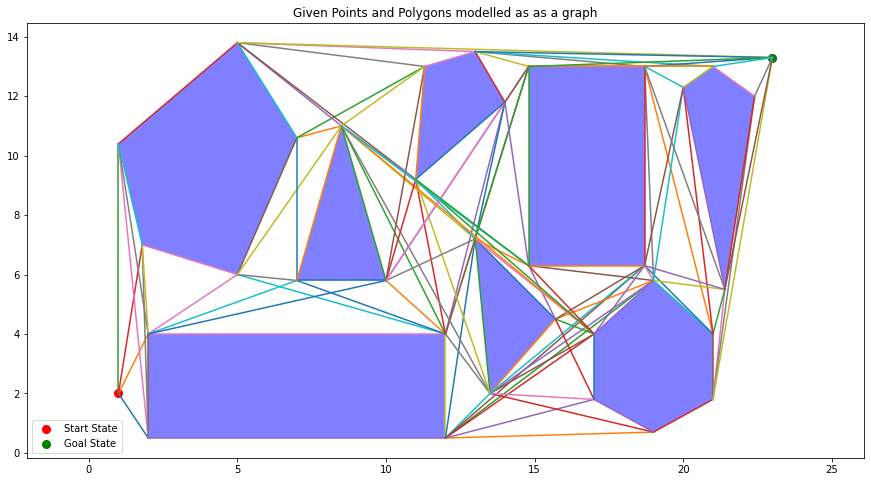

In [5]:
plot_polygons(pol_list, maze, edges=True, title="Given Points and Polygons modelled as as a graph")

# Breath First Search

Path Found :  [0, 17, 16, 34]
Path Cost  :  31.66
Time taken to complete BFS :  1.15 ms


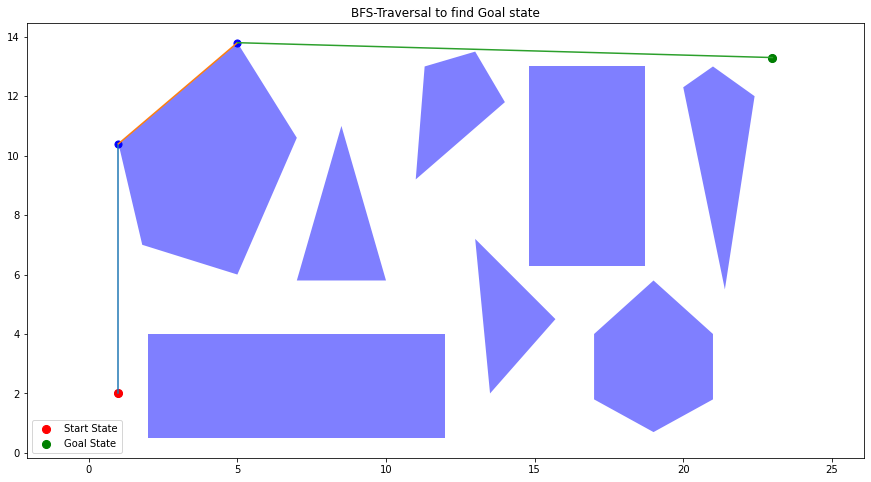

CPU times: user 270 ms, sys: 7.76 ms, total: 278 ms
Wall time: 273 ms


In [7]:
%%time
st = time.time()
bfs_path, bfs_cost = maze.bfs(False)
print("Path Found : ",bfs_path)
print("Path Cost  : ",round(bfs_cost,2))
et = time.time()
print("Time taken to complete BFS : ", round((et-st)*1000,2), "ms")

plot_path(pol_list, maze, bfs_path, "BFS-Traversal to find Goal state")

# Greedy - Best First Search

Path Found :  [0, 18, 14, 3, 29, 34]
Path Cost  :  33.33
Time taken to complete Greedy-BFS :  2.29 ms


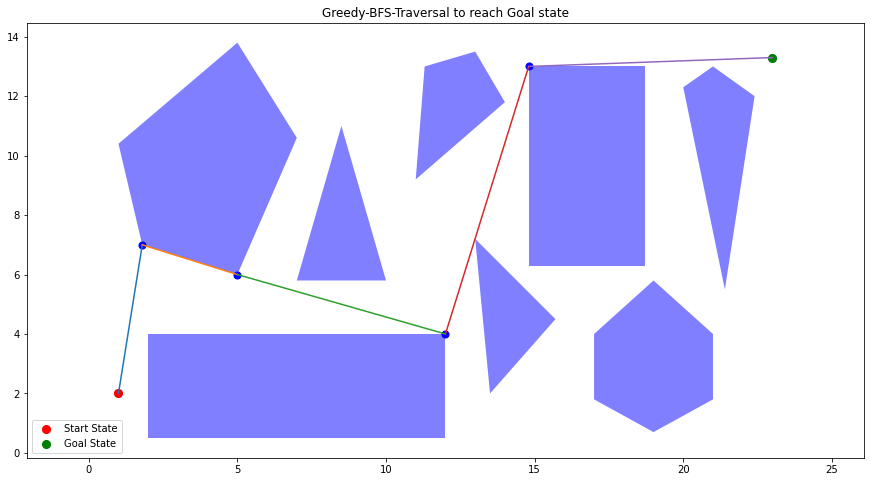

CPU times: user 278 ms, sys: 3.56 ms, total: 281 ms
Wall time: 274 ms


In [8]:
%%time
st = time.time()
gbfs_path, gbfs_cost = maze.gbfs(False)
print("Path Found : ",gbfs_path)
print("Path Cost  : ",round(gbfs_cost,2))
et = time.time()
print("Time taken to complete Greedy-BFS : ", round((et-st)*1000,2), "ms")

plot_path(pol_list, maze, gbfs_path, "Greedy-BFS-Traversal to reach Goal state")

# A* Search

Path Found :  [0, 4, 20, 23, 24, 34]
Path Cost  :  29.62
Time taken to complete A*-Search :  1.15 ms


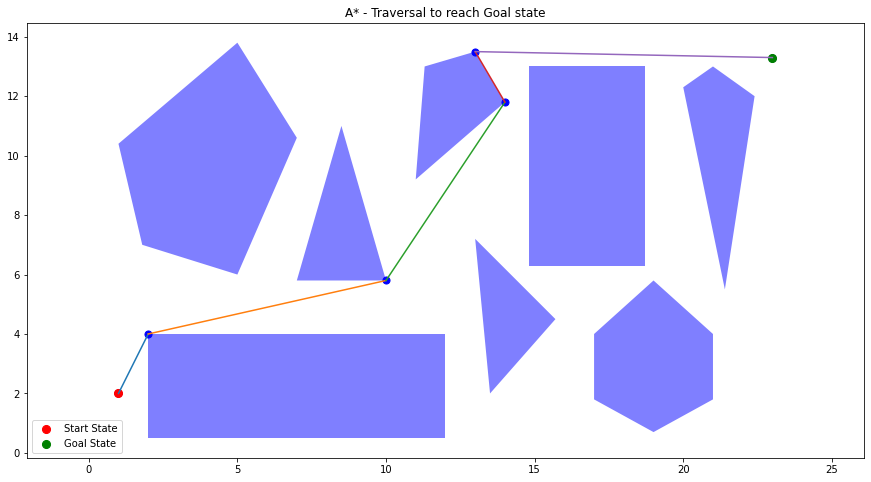

CPU times: user 268 ms, sys: 4.03 ms, total: 272 ms
Wall time: 268 ms


In [9]:
%%time
st = time.time()
a_star_path, a_star_cost = maze.a_star(False)
print("Path Found : ",a_star_path)
print("Path Cost  : ",round(a_star_cost,2))
et = time.time()
print("Time taken to complete A*-Search : ", round((et-st)*1000,2), "ms")

plot_path(pol_list, maze, a_star_path, "A* - Traversal to reach Goal state")

# Generating random Polygons

The idea is to generate random polygons and test the time taken by each algorithm to reach the goal state
    
 

In [13]:
def gen_poly(count, initial, goal):
    '''
    This function generates 'count' number of non-intersecting polygons 
    '''
    X_MIN = min(initial[0],goal[0])
    X_MAX = max(initial[0],goal[0])
    
    Y_MIN = min(initial[1],goal[1])
    Y_MAX = max(initial[1],goal[1])
    
    polys = []
    
    while count > 0:
        new_poly = []
        num_vertex = 3
        for i in range(num_vertex):
            new_poly.append((random.uniform(X_MIN,X_MAX),random.uniform(Y_MIN,Y_MAX)))
            
        nonInterPoly = True
        for old_poly in polys:
            if sg.Polygon(new_poly).intersects(sg.Polygon(old_poly)):
                nonInterPoly = False
                break
        
        if nonInterPoly:
            polys.append(new_poly)
            count-=1
    
    return polys


In [20]:
initial = (1.0, 2.0)
goal = (23.0 , 13.3)
polygons = gen_poly(4, initial, goal)
pol_list = [sg.Polygon(p) for p in polygons]

maze = PathSearch(initial, goal, polygons)


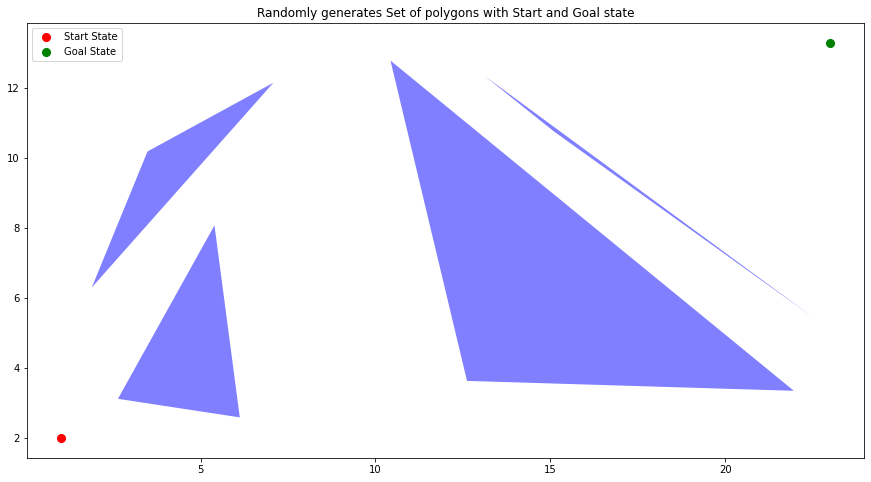

In [21]:
plot_polygons(pol_list, maze, edges = False, title = "Randomly generates Set of polygons with Start and Goal state")

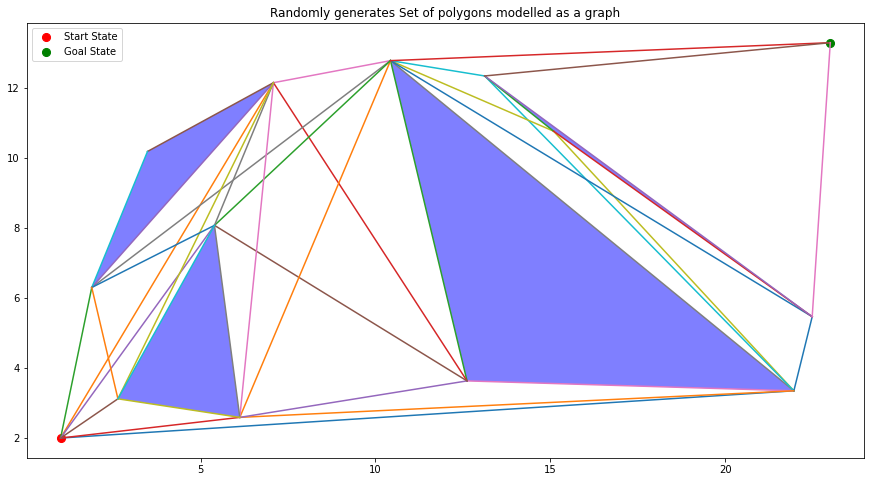

In [22]:
plot_polygons(pol_list, maze, edges = True, title = "Randomly generates Set of polygons modelled as a graph")


### Testing a different sets of polygons with all the three algorithms 

In [47]:
def test_polys(sizes, initial, goal, function):
    '''
    This function takes in sizes and generates different set of polygons,
    to test the time taken by each algorithm to reach the goal state. 
    '''
    times = []
    for size in sizes:
        polygons = gen_poly(size, initial, goal)
        pol_list = [sg.Polygon(p) for p in polygons]
        maze = PathSearch(initial, goal, polygons)
        
        st = time.time()
        func_path, func_cost = function(False)
        et = time.time()
        
        times.append(round((et-st)*1000,2))
    
    return times

In [58]:
sizes = [5,15,20,35,50]
intial = (1.0, 2.0)
goal = (23.0, 13.3)

bfs_times  = test_polys(sizes, initial, goal, maze.bfs)
gbfs_times  = test_polys(sizes, initial, goal, maze.gbfs)
a_star_times  = test_polys(sizes, initial, goal, maze.a_star)

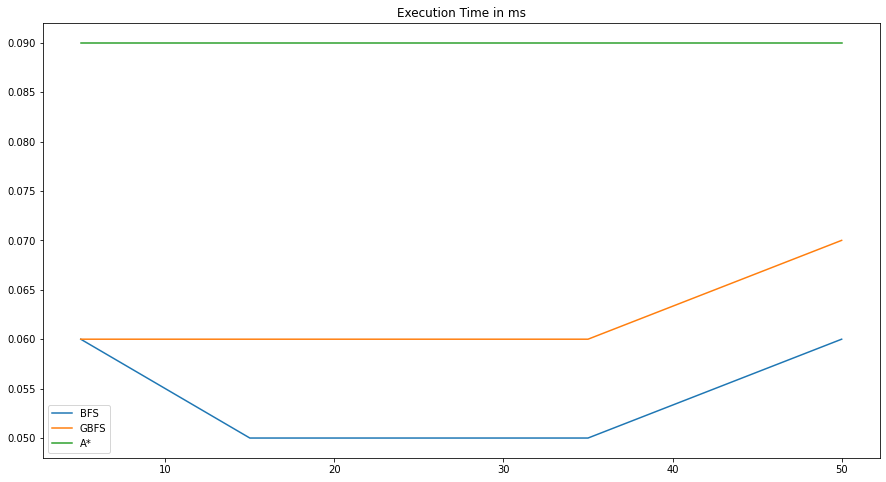

In [59]:
plt.plot(sizes, bfs_times, label="BFS")
plt.plot(sizes, gbfs_times, label="GBFS")
plt.plot(sizes, a_star_times, label="A*")

plt.title("Execution Time in ms")
plt.legend()
plt.show()

### Conclusion:

* BFS though faster , does not find near optimal path
* Greedy-BFS faster than A*, does not contain shortest path
* A* though slower finds an near optimal path